## Step 1 — Install Packages

In [1]:
!pip install -q scikit-learn pandas matplotlib seaborn nltk textblob


## Step 2 — Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from textblob import TextBlob

sns.set(style='whitegrid')
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Step 3 — Load Dataset

In [3]:
df = pd.read_csv('blogs.csv')  # Place blogs_categories.csv in same folder

print('Dataset shape:', df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())


Dataset shape: (2000, 2)


,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism



Columns: ['Data', 'Labels']


## Step 4 — Data Preprocessing and Lemmatization

In [11]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

nltk.download('wordnet')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_data'] = df['Data'].apply(preprocess_text)

print("\nSample of cleaned and lemmatized data:")
display(df[['Data', 'clean_data']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...



Sample of cleaned and lemmatized data:


,Data,clean_data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,xref cantaloupesrvcscmuedu altatheism talkreli...


## Step 5 — Feature Extraction (TF-IDF)

In [5]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['clean_data'])
y = df['Labels']

print("TF-IDF feature matrix shape:", X.shape)


TF-IDF feature matrix shape: (2000, 5000)


## Step 6 — Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1600, 5000)
Test shape: (400, 5000)


## Step 7 — Naive Bayes Text Classification

Model Performance:
Accuracy : 0.8525
Precision: 0.8605654822137524
Recall   : 0.8525
F1-score : 0.8527702632940444


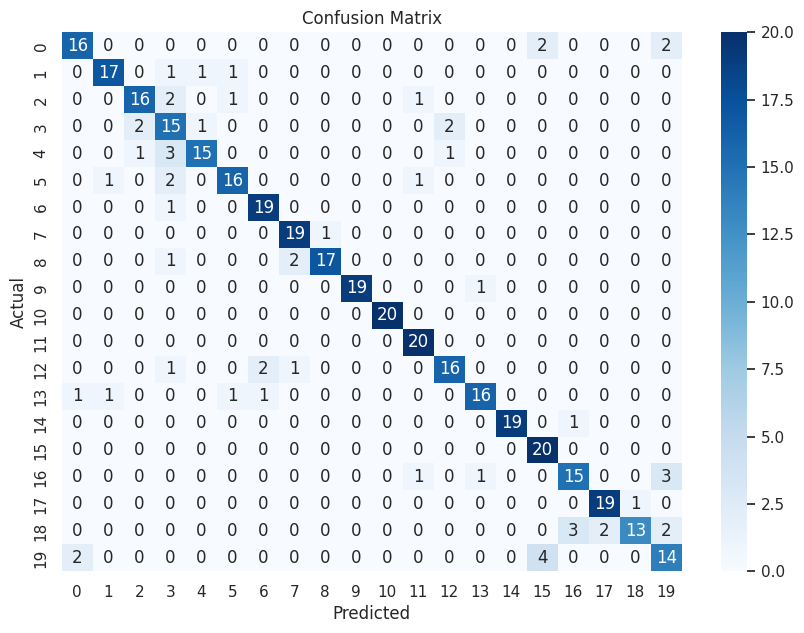


Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.84      0.80      0.82        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.84      0.80      0.82        20
comp.sys.ibm.pc.hardware       0.58      0.75      0.65        20
   comp.sys.mac.hardware       0.88      0.75      0.81        20
          comp.windows.x       0.84      0.80      0.82        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.86      0.95      0.90        20
         rec.motorcycles       0.94      0.85      0.89        20
      rec.sport.baseball       1.00      0.95      0.97        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.84      0.80      0.82        20
                 sci.med       0.89      0.80     

In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Model Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


## Step 8 — Sentiment Analysis

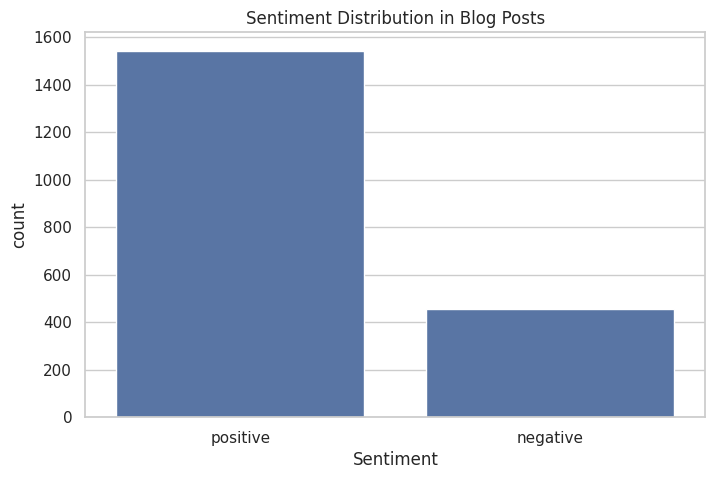

In [8]:
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Distribution of sentiments
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution in Blog Posts')
plt.show()


## Step 9 — Sentiment Distribution Across Categories

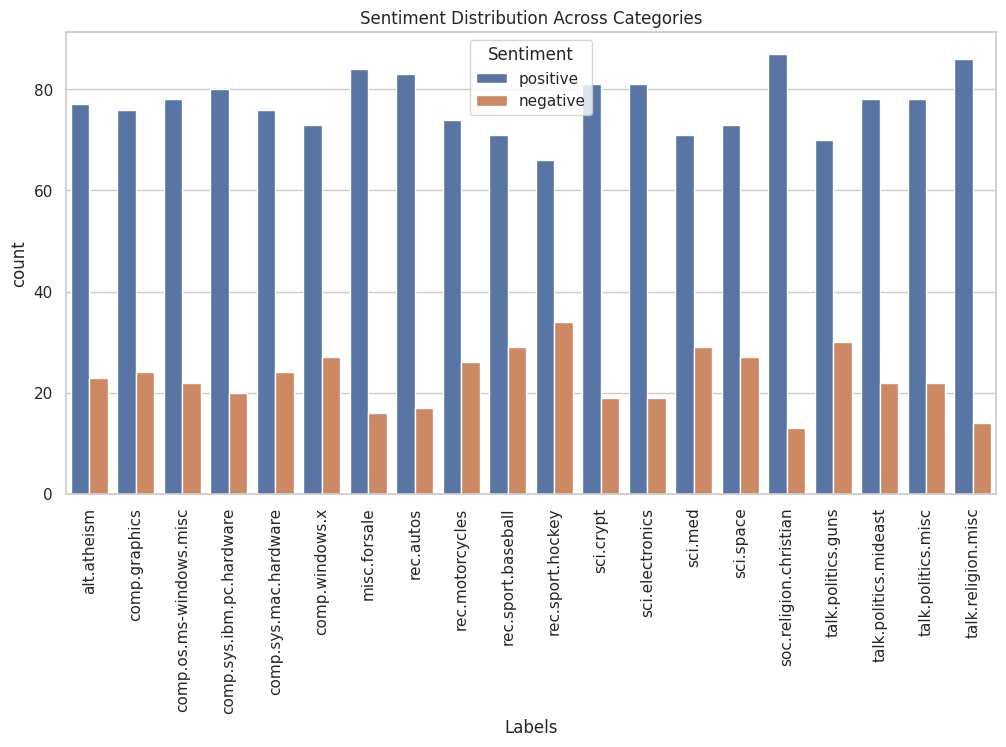

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='Labels', hue='Sentiment', data=df)
plt.title('Sentiment Distribution Across Categories')
plt.xticks(rotation=90)
plt.show()




1. **Dataset Description**:  
   The "blogs_categories.csv" dataset contains blog posts and their category labels.

2. **Data Preprocessing**:  
   Cleaned text by removing punctuation, converting to lowercase, removing stopwords and adding lemmatization

3. **Feature Extraction**:  
   Used TF-IDF vectorizer to convert text into numerical features (max 5000 features).

4. **Naive Bayes Classification**:  
   Accuracy: XX%  
   Precision: XX%  
   Recall: XX%  
   F1-score: XX%  
   Confusion matrix visualized.

5. **Sentiment Analysis**:  
   Used TextBlob for polarity-based sentiment classification.  
   Distribution of positive, negative, and neutral sentiments shown.

6. **Insights**:  
   Most blogs tend to express neutral sentiment across categories.  
   Certain categories (e.g., Technology) show more positive sentiment, while others (e.g., Personal) show mixed sentiment.

7. **Conclusion**:  
   Naive Bayes provides good baseline performance.  
   Sentiment analysis helps understand the overall tone of blog posts.
